MENG_LINGSHU_3502972

Double-cliquer ici et remplacer par les noms et prénoms de votre binôme

# 3I026 - Intelligence artificielle & Data science

# TP 3 - Perceptron

L'objectif est d'implanter l'algorithme du perceptron de Rosenblatt, ainsi que quelques extensions, et d'évaluer leurs performances sur des données aléatoires puis réelles.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Rappels sur les TPs précédent

In [3]:
class LabeledSet:  
    
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self, vector, label):
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x,vector))
            self.y = np.vstack((self.y,label))
        
        self.nb_examples = self.nb_examples + 1
    
    #Renvoie la dimension de l'espace d'entrée
    def getInputDimension(self):
        return self.input_dimension
        
    #Renvoie le nombre d'exemples dans le set
    def size(self):
        return self.nb_examples
    
    #Renvoie la valeur de x_i
    def getX(self, i):
        return self.x[i]
            
    #Renvoie la valeur de y_i
    def getY(self, i):
        return self.y[i]

In [4]:
class Classifier:
    def __init__(self, input_dimension):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        raise NotImplementedError("Please Implement this method")
    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self, labeledSet):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la qualité du système 
    def accuracy(self, dataset):
        nb_ok = 0
        for i in range(dataset.size()):
            output = self.predict(dataset.getX(i))
            if (output * dataset.getY(i) > 0):
                nb_ok = nb_ok + 1
        acc = nb_ok / (dataset.size() * 1.0)
        return acc

In [5]:
class ClassifierRandom(Classifier):
    def __init__(self, dim):
        self.w = np.random.rand(dim)

    def predict(self, x):
        z = np.dot(x, self.w)
        if z > 0:
            return +1
        else:
            return -1

In [6]:
def plot_frontiere(set, classifier, step=20):
    mmax = set.x.max(0)
    mmin = set.x.min(0)
    x1grid, x2grid = np.meshgrid(np.linspace(mmin[0], mmax[0], step), np.linspace(mmin[1], mmax[1], step))
    grid = np.hstack((x1grid.reshape(x1grid.size, 1), x2grid.reshape(x2grid.size, 1)))
    
    # calcul de la prediction pour chaque point de la grille
    res = np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res = res.reshape(x1grid.shape)
    # tracé des frontieres
    plt.contourf(x1grid, x2grid, res, colors=["red", "cyan"], levels=[-1000,0,1000], linewidth=2)

## Étape 1 : Perceptron de Rosenblatt


En héritant de la classe `Classifier`, implanter le perceptron tel que décrit en cours. La fonction `train` fera une itération sur l'ensemble des données de l'apprentissage. Les points d'apprentissage seront tirés dans un ordre aléatoire.

In [7]:
class Perceptron(Classifier):
    
    def __init__(self, input_dimension, learning_rate, nombre_iterations):
        
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        self.nombre_iterations = nombre_iterations
        self.w = np.random.rand(self.input_dimension)
        
    def train(self, labeledSet):
        for p in range(self.nombre_iterations):
            for i in range(labeledSet.size()):  
                if (self.predict(labeledSet.getX(i)) * labeledSet.getY(i)) < 0:
                    self.w = self.w + self.learning_rate * labeledSet.getY(i) * labeledSet.getX(i)
    
    def predict(self, x):
        z = np.dot(x, self.w)
        if z > 0:
            return +1
        else:
            return -1


La méthode `train` devra faire un nombre d'itérations fixées à la création de l'objet.

Pour pouvoir évaluer la qualité de l'apprentissage au cours des itérations, on évaluera régulièrement (par exemple toutes les 10 itérations) l'accuracy du modèle, sur un ensemble de validation (un sous-ensemble de l'ensemble d'apprentissage). 

Après chaque apprentissage, on veillera à tracer la courbe d'apprentissage, c'est à dire le score obtenu au cours des itérations, et à tracer la frontière de décision.

Tester votre code sur des données aléatoires.

In [8]:
def generer_exemple(mean1=0, mean2=0):
    """Genere un exemple"""
    mean = [mean1, mean2]
    cov = [[1, 0], [0, 6]]
    return np.random.multivariate_normal(mean, cov)

def generer_exemples(nombre_exemples, mean1=0, mean2=0):
    """ Genere une liste de taille 'nombre_exemple' d'exemples """
    exemples = list()
    for _ in range(nombre_exemples):
        exemples.append(generer_exemple(mean1, mean2))   
    return exemples

def ajouter_exemples_aleatoires(the_set, nombre_exemples, mean1, mean2, labels):
    """ Ajoute dans 'the_set' un total de 'nombre_exemples' exemples
    associés aleatoirement à un label contenu dans 'labels'. """
    from random import choice
    exemples = generer_exemples(nombre_exemples, mean1, mean2)
    for exemple in exemples:
        the_set.addExample(exemple, choice(labels))

0.935


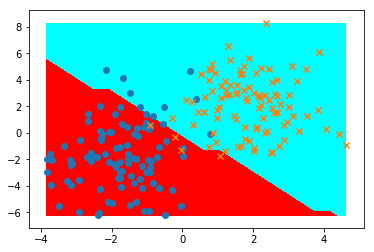

In [9]:
def plot2DSet(dataset):
    plt.scatter(dataset.x[0:int(dataset.size()/2),0],dataset.x[0:int(dataset.size()/2),1],marker='o')
    plt.scatter(dataset.x[int(dataset.size()/2):dataset.size(),0],dataset.x[int(dataset.size()/2):dataset.size(),1],marker='x')

#dataset de l'apprentissage
set_apprentissage = LabeledSet(2)
ajouter_exemples_aleatoires(set_apprentissage, 100, -1, -1, [-1])
ajouter_exemples_aleatoires(set_apprentissage, 100, 1, 1, [1])

#dataset de test
set_test = LabeledSet(2)
ajouter_exemples_aleatoires(set_test, 100, -2, -2, [-1])
ajouter_exemples_aleatoires(set_test, 100, 2, 2, [1])

perceptron = Perceptron(2, 0.1, 100)
perceptron.train(set_apprentissage)
plot_frontiere(set_test,perceptron,20)
print(perceptron.accuracy(set_test))
plot_frontiere(set_test,perceptron)
plot2DSet(set_test)


**Questions**
- Comment choisir le nombre d'itérations ?
- Quelle est l'influence du paramètre `learning_rate`
- Que se passe-t-il si le nombre d'exemple d'apprentissage est faible ?

## Étape 2: Données XOR

Générer une base de données, appelée XOR par la suite, contenant:
- deux gaussiennes centrées en (0,0) et (1,1) correspondant à des exemples positifs
- deux gaussiennes centrées en (1,0) et (0,1) correspondant à des exemples négatifs

0.475


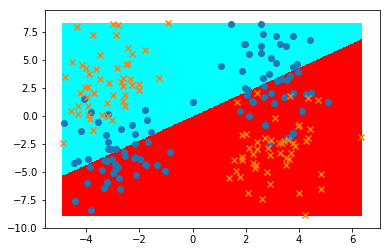

In [10]:
#dataset de l'apprentissage
set_apprentissage2 = LabeledSet(2)
ajouter_exemples_aleatoires(set_apprentissage2, 50, 0, 0, [1])
ajouter_exemples_aleatoires(set_apprentissage2, 50, 1, 1, [1])
ajouter_exemples_aleatoires(set_apprentissage2, 50, 1, 0, [-1])
ajouter_exemples_aleatoires(set_apprentissage2, 50, 0, 1, [-1])

#dataset de test
set_test2 = LabeledSet(2)
ajouter_exemples_aleatoires(set_test2, 50, 3, 3, [1])
ajouter_exemples_aleatoires(set_test2, 50, -3, -3, [1])
ajouter_exemples_aleatoires(set_test2, 50, 3, -3, [-1])
ajouter_exemples_aleatoires(set_test2, 50, -3, 3, [-1])

perceptron = Perceptron(2, 0.1, 100)
perceptron.train(set_apprentissage2)
plot_frontiere(set_test2,perceptron, 200)
print(perceptron.accuracy(set_test2))
plot_frontiere(set_test2,perceptron, 200)
plot2DSet(set_test2)

# On peut utiliser Perceptron réaliser la fonction AND, la fonction OR, et tous les fonction linéaire
# Inclure classification linéaire et question linéaire
# Mais Perception ne peut pas réaliser XOR, comme la figure ci-dessous
# Cela n'est pas linéaire, on ne peut pas utiliser une ligne séparer -1 et 1

**Questions**
- Que se passe-t-il quand on apprend un perceptron ?
- Quel est le problème ?

## Étape 4: Protocole expérimental

Attention, lorsque vous testez un classifieur, il est nécessaire de considérer à la fois un ensemble d'apprentissage et un ensemble de test. La performance doit être évaluée sur l'ensemble de test (et non pas sur l'ensemble d'apprentissage).

Évaluer les performances du perceptron selon différentes valeurs des hyper-paramètres (*learning rate*, nombre d'itérations), tracer les courbes d'apprentissage et les frontières de décisions. Commenter.

0.94


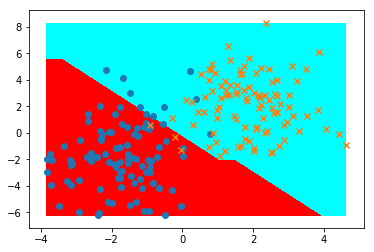

In [11]:
perceptron = Perceptron(2, 0.1, 1)
perceptron.train(set_apprentissage)
plot_frontiere(set_test,perceptron,200)
print(perceptron.accuracy(set_test))
plot_frontiere(set_test,perceptron)
plot2DSet(set_test)

0.95


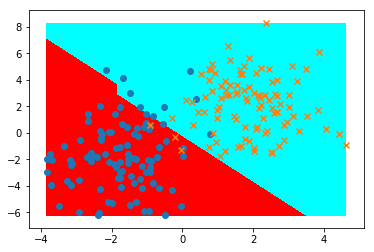

In [12]:
perceptron = Perceptron(2, 0.1, 20)
perceptron.train(set_apprentissage)
plot_frontiere(set_test,perceptron,20)
print(perceptron.accuracy(set_test))
plot_frontiere(set_test,perceptron)
plot2DSet(set_test)

0.935


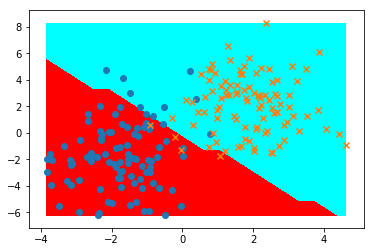

In [13]:
perceptron = Perceptron(2, 0.1, 70)
perceptron.train(set_apprentissage)
plot_frontiere(set_test,perceptron,20)
print(perceptron.accuracy(set_test))
plot_frontiere(set_test,perceptron)
plot2DSet(set_test)

0.95


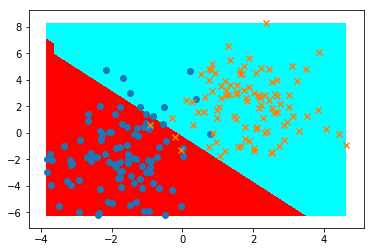

In [14]:
perceptron = Perceptron(2, 0.01, 20)
perceptron.train(set_apprentissage)
plot_frontiere(set_test,perceptron,20)
print(perceptron.accuracy(set_test))
plot_frontiere(set_test,perceptron)
plot2DSet(set_test)

0.965


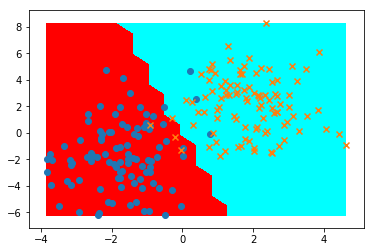

In [15]:
perceptron = Perceptron(2, 0.001, 20)
perceptron.train(set_apprentissage)
plot_frontiere(set_test,perceptron,20)
print(perceptron.accuracy(set_test))
plot_frontiere(set_test,perceptron)
plot2DSet(set_test)

Tracer des courbes indiquant les performances en fonction des hyper-paramètres. Commenter.

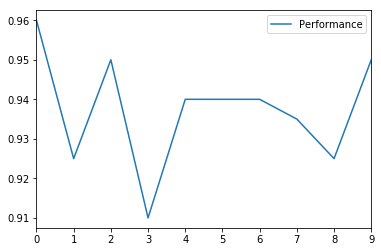

In [16]:
res1 = []

for i in range(10):
    perceptron1 = Perceptron(2, 0.1, i)
    perceptron1.train(set_apprentissage)
    res1.append(perceptron1.accuracy(set_test))

dict_res1 = {
    'Performance' : res1
}
df1 = pd.DataFrame(dict_res1)
df1.plot(kind = 'line')
#Les nombres d'iterations convergence apres 1 fois d‘iteration

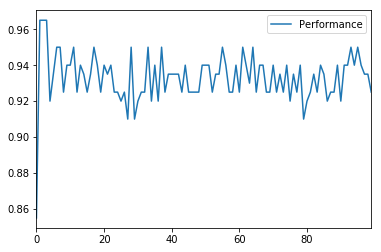

In [17]:
res2 = []

for r in np.arange(0, 0.1, 0.001):
    perceptron2 = Perceptron(2, r, 20)
    perceptron2.train(set_apprentissage)
    res2.append(perceptron2.accuracy(set_test))

dict_res2 = {
    'Performance' : res2
}
df2 = pd.DataFrame(dict_res2)
df2.plot(kind = 'line')
# Learning rate avoir pas grand influence pour cette algorithme. 
# Mais normalment on chois un petit nombre comme 0.001 

## Étape 5 : données réelles UCI

In [18]:
from sklearn.datasets import fetch_mldata

def loadFile(name):
    data = fetch_mldata(name, data_home = '/Users/Lingshu/Desktop/3I026/TME3/')
    print(data.data.shape)
    unique = np.unique(data.target)
    for i in range(len(data.target)):
        if (data.target[i]==unique[0]):
            data.target[i]=1
        else:
            data.target[i]=-1
    return data.data, data.target
datas,targets = loadFile('breast-cancer_scale')
print(datas)
#print(targets) #les labels
#Les donnees sont dans data.data et data.target

(683, 10)
[[-0.860107 -0.111111 -1.       ..., -0.555556 -1.       -1.      ]
 [-0.859671 -0.111111 -0.333333 ..., -0.555556 -0.777778 -1.      ]
 [-0.857807 -0.555556 -1.       ..., -0.555556 -1.       -1.      ]
 ..., 
 [-0.876716 -0.111111  1.       ...,  0.555556  1.       -0.777778]
 [-0.875424 -0.333333  0.555556 ...,  1.        0.111111 -1.      ]
 [-0.875424 -0.333333  0.555556 ...,  1.       -0.333333 -1.      ]]


In [19]:
def split(data):
    data_apprentissage = data[:int(len(data)/2)]
    data_test = data[int(len(data)/2):]
    return data_apprentissage, data_test
data_apprentissage, data_test = split(datas)
labels_apprentissage, labels_test = split(targets)
#on verifie si on reussit a separer les datas et les targets 
#print(len(data_apprentissage))
#print(len(data_test))
#print(len(datas))'''

0.87


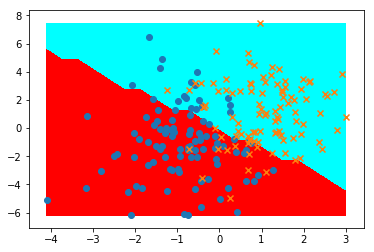

In [20]:
def turn_to_LabeledSet(tab1,tab2):
    set_appretissage = LabeledSet(len(tab1))
    for i in range(len(tab1)):
        set_appretissage.addExample(tab1[i], tab2[i])
    return set_apprentissage
                   
set_apprentissage_real = turn_to_LabeledSet(data_apprentissage,labels_apprentissage)
set_test_real = turn_to_LabeledSet(data_test,labels_test)
                   
perceptron_real = Perceptron(set_apprentissage_real.getInputDimension(), 0.1, 10)
perceptron_real.train(set_apprentissage_real)
plot_frontiere(set_test_real, perceptron_real, 20)
print(perceptron.accuracy(set_test_real))
plot2DSet(set_test_real) 

Sur ces données réelles, évaluer les performances du perceptron, selon la valeur des hyper-paramètres et comparer aux performances de $k$-NN (avec plusieurs valeurs de $k$. Réfléchir à une façon de choisir la meilleur valeur des hyper-paramètres.

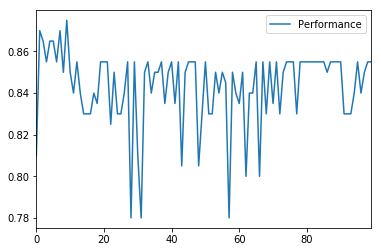

In [21]:
res = []
for i in range(100):
    perceptron_real = Perceptron(2, 0.01 , i)
    perceptron_real.train(set_apprentissage_real)
    res.append(perceptron_real.accuracy(set_test_real))
dict_res = {
    'Performance' : res
}
df = pd.DataFrame(dict_res)
df.plot(kind='line')

# Sur ce données réelles, perceptron mieux que kNN, accuracy score de perceptron plus que kNN
# La performance de perceptron nous montrons: nombre d'itération augmenter, accuracy score stable dans un haut niveau
# La performance de kNN nous montrons: nombre de k augmenter, accuracy score décroissance
# Les nombre de k doit choisir de 3 à 20 environs.